# **Linear Learner com Censu**

## Carregamento e Exploração dos Dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
base_census = pd.read_csv('census.csv')
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,inative-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
base_census.isnull().sum()

age                0
workclass          0
final-weight       0
education          0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loos       0
hour-per-week      0
inative-country    0
income             0
dtype: int64

In [6]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

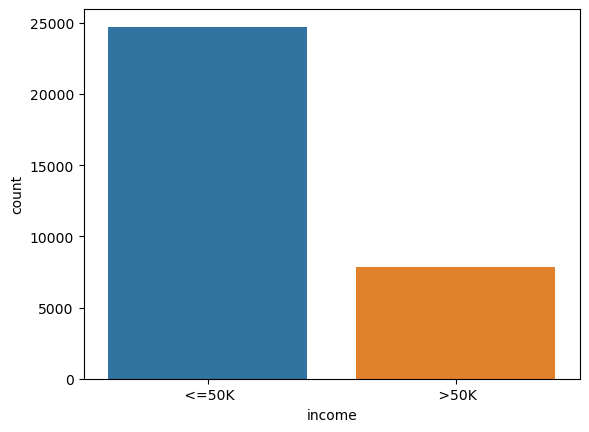

In [7]:
sns.countplot(x=base_census['income']);

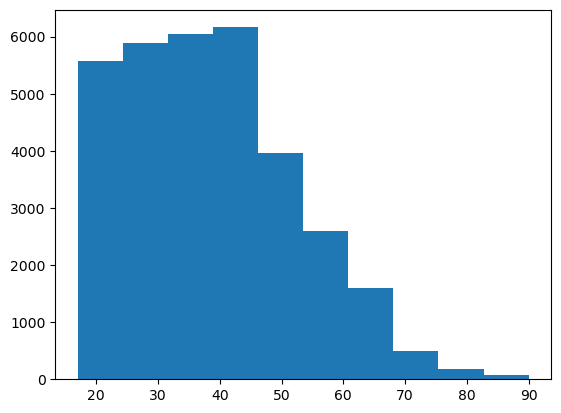

In [8]:
plt.hist(x=base_census['age']);

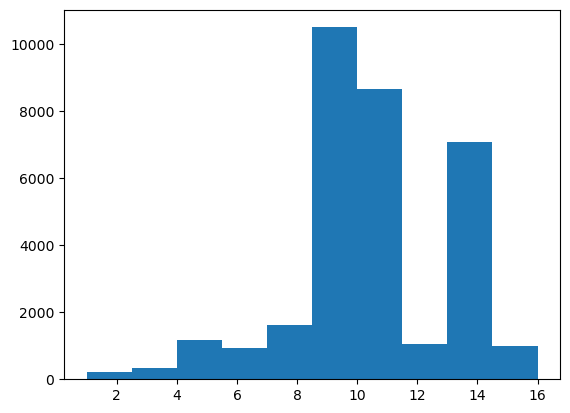

In [9]:
plt.hist(x=base_census['education-num']);

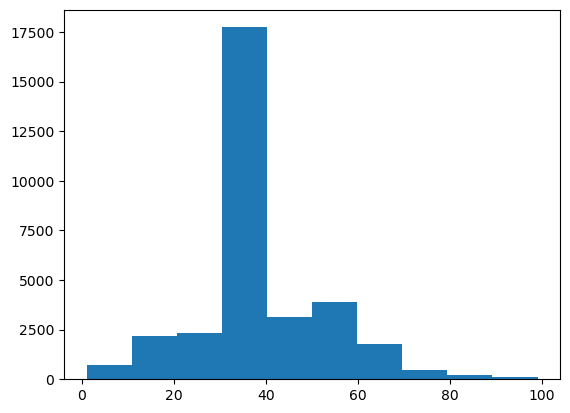

In [10]:
plt.hist(x=base_census['hour-per-week']);

## Tratamento dos Dados 

In [11]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'inative-country',
       'income'],
      dtype='object')

In [12]:
colunas = []
colunas.append('income')
for i in range(len(base_census.columns[:-1])):
    colunas.append(base_census.columns[i])

In [13]:
colunas

['income',
 'age',
 'workclass',
 'final-weight',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loos',
 'hour-per-week',
 'inative-country']

In [14]:
base_census = base_census[colunas]
base_census

,income,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,inative-country
0,<=50K,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,<=50K,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,<=50K,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,<=50K,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,<=50K,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,<=50K,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,>50K,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,<=50K,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,<=50K,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [15]:
base_census = pd.get_dummies(
    base_census, prefix=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'inative-country'],
    columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'inative-country']
)

In [16]:
base_census

,income,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,inative-country_ Portugal,inative-country_ Puerto-Rico,inative-country_ Scotland,inative-country_ South,inative-country_ Taiwan,inative-country_ Thailand,inative-country_ Trinadad&Tobago,inative-country_ United-States,inative-country_ Vietnam,inative-country_ Yugoslavia
0,<=50K,39,77516,13,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,<=50K,50,83311,13,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,<=50K,38,215646,9,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,<=50K,53,234721,7,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,<=50K,28,338409,13,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,<=50K,27,257302,12,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,>50K,40,154374,9,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,<=50K,58,151910,9,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,<=50K,22,201490,9,0,0,20,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
X = base_census.iloc[:, 1:len(base_census)].values
X = np.array(X).astype('float32')
X

array([[3.90000e+01, 7.75160e+04, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.00000e+01, 8.33110e+04, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.80000e+01, 2.15646e+05, 9.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [5.80000e+01, 1.51910e+05, 9.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.20000e+01, 2.01490e+05, 9.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.20000e+01, 2.87927e+05, 9.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]], dtype=float32)

In [18]:
X.shape

(32561, 108)

In [19]:
y = base_census.iloc[:, 0].values
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_1 = []
for i in y:
    #print(i)
    if i == ' >50K':
        y_1.append(1.0)
    else:
        y_1.append(0.0)
print(y_1)

In [21]:
y = np.array(y_1).astype('float32')

In [22]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [23]:
X_treinamento.shape, X_teste.shape

((22792, 108), (9769, 108))

## Configurações do SageMaker

In [24]:
import sagemaker
import boto3
from sagemaker import Session
import sagemaker.amazon.common as smac
import io
import os

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [25]:
session = sagemaker.Session()
bucket = 'praticaawssagemaker'
subpasta_modelo = 'modelos/census/linear-learner'
subpasta_dataset = 'datasets/census'
key = 'census-train-data'
role = sagemaker.get_execution_role()
s3_train_data = f's3://{bucket}/{subpasta_dataset}/train/{key}'
output_location = f's3://{bucket}/{subpasta_modelo}'
print(f'Localização da base de treinamento: {s3_train_data}')
print(f'Modelo final será salvo em: {output_location}')

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
Localização da base de treinamento: s3://praticaawssagemaker/datasets/census/train/census-train-data
Modelo final será salvo em: s3://praticaawssagemaker/modelos/census/linear-learner


In [26]:
buffer = io.BytesIO()
smac.write_numpy_to_dense_tensor(buffer, X_treinamento, y_treinamento)
buffer.seek(0)

0

In [27]:
boto3.resource('s3').Bucket(bucket).Object(os.path.join(subpasta_dataset, 'train', key)).upload_fileobj(buffer)

## Criação e Treinamento do Linear Learner

In [28]:
container = sagemaker.image_uris.retrieve(
    framework='linear-learner', region=boto3.Session().region_name
)

In [29]:
linear = sagemaker.estimator.Estimator(
    image_uri=container, role=role, instance_count=1, 
    instance_type='ml.m4.xlarge', output_path=output_location, sagemaker_session=session, 
    use_stop_instances=True
)

In [30]:
linear.set_hyperparameters(
    feature_dim=108, predictor_type='binary_classifier', num_models=8
)

In [31]:
linear.fit({'train': s3_train_data})

INFO:sagemaker:Creating training-job with name: linear-learner-2023-10-21-13-29-14-063


2023-10-21 13:29:14 Starting - Starting the training job...
2023-10-21 13:29:40 Starting - Preparing the instances for training.........
2023-10-21 13:30:53 Downloading - Downloading input data...
2023-10-21 13:31:23 Training - Downloading the training image......
2023-10-21 13:32:33 Training - Training image download completed. Training in progress...Docker entrypoint called with argument(s): train
Running default environment configuration script
[10/21/2023 13:32:50 INFO 140406249469760] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss

## Deploy, Previsões e Avaliação 

In [32]:
linear_classifier = linear.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

INFO:sagemaker:Creating model with name: linear-learner-2023-10-21-13-33-26-736
INFO:sagemaker:Creating endpoint-config with name linear-learner-2023-10-21-13-33-26-736
INFO:sagemaker:Creating endpoint with name linear-learner-2023-10-21-13-33-26-736


-------!

In [33]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

In [34]:
linear_classifier.serializer = CSVSerializer()
linear_classifier.deserializer = JSONDeserializer()

In [35]:
results = linear_classifier.predict(X_teste)
results

{'predictions': [{'score': 0.027378464117646217, 'predicted_label': 0},
  {'score': 0.06295986473560333, 'predicted_label': 0},
  {'score': 0.3523733615875244, 'predicted_label': 0},
  {'score': 0.164517343044281, 'predicted_label': 0},
  {'score': 0.29074206948280334, 'predicted_label': 0},
  {'score': 0.4239807426929474, 'predicted_label': 0},
  {'score': 0.012328230775892735, 'predicted_label': 0},
  {'score': 0.045032814145088196, 'predicted_label': 0},
  {'score': 0.17694491147994995, 'predicted_label': 0},
  {'score': 0.006132916081696749, 'predicted_label': 0},
  {'score': 0.0032468154095113277, 'predicted_label': 0},
  {'score': 0.11298056691884995, 'predicted_label': 0},
  {'score': 0.8369913101196289, 'predicted_label': 1},
  {'score': 0.011913130059838295, 'predicted_label': 0},
  {'score': 0.2441239058971405, 'predicted_label': 0},
  {'score': 0.4377380609512329, 'predicted_label': 0},
  {'score': 0.4039059579372406, 'predicted_label': 0},
  {'score': 0.8299394249916077, 'p

In [36]:
previsoes = np.array([r['predicted_label'] for r in results['predictions']])
previsoes

array([0, 0, 0, ..., 1, 0, 0])

In [37]:
y_teste = np.array(y_teste).astype(int)
y_teste

array([0, 0, 0, ..., 1, 0, 0])

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy_score(y_teste, previsoes)

0.8456341488381616

In [39]:
cm = confusion_matrix(y_teste, previsoes)
cm

array([[6898,  509],
       [ 999, 1363]])

In [40]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7407
           1       0.73      0.58      0.64      2362

    accuracy                           0.85      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769



In [41]:
linear_classifier.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2023-10-21-13-33-26-736
INFO:sagemaker:Deleting endpoint with name: linear-learner-2023-10-21-13-33-26-736
